In [36]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import time
from subprocess import check_output
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import folium
from folium import plugins

In [30]:
original_data = pd.read_csv("/home/jovyan/work/Machine_Learning/elm_assignment/input/food_inspections_demo.csv")
processed_data = pd.read_csv("/home/jovyan/work/Machine_Learning/elm_assignment/input/eda_data.csv")  
original_data.drop(columns=['dba_name'
                           ,'license'
                           ,'risk'
                           ,'address'
                           ,'city'
                           ,'state'
                           ,'zip'
                           ,'inspection_date'
                           ,'inspection_type'
                           ,'results'
                           ,'location'],inplace=True)

data = pd.merge(original_data,processed_data,how='inner',on='inspection_id')
#data["inspection_date"] = pd.to_datetime(data["inspection_date"])
#data.sort_values("inspection_date", inplace=True)
data.drop(columns=['date_time'], inplace=True)
data.set_index('inspection_id',inplace=True)
data.head(3)

aka_name facility_type_x  \
inspection_id                                                      
2492236                       ECUADOR RESTAURANT      Restaurant   
2492226                     FIESTA BURGER HEAVEN      Restaurant   
2485184        SUPER TAQUERIA EL TACONAZO EL TIO      Restaurant   

                                                      violations   latitude  \
inspection_id                                                                 
2492236        56. ADEQUATE VENTILATION & LIGHTING; DESIGNATE...  41.931963   
2492226        43. IN-USE UTENSILS: PROPERLY STORED - Comment...  41.751179   
2485184        47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...  41.924518   

               longitude  license          inspection_date facility_type_y  \
inspection_id                                                                
2492236       -87.701000    39981  2021-02-26T00:00:00.000      Restaurant   
2492226       -87.663605  2390841  2021-02-26T00:00:00.000      Restaurant   
2485184       -87.715007  2458442  2021-02-25T00:00:00.000      Restaurant   

              results           risk  ...  past_serious  past_minor  \
inspection_id                         ...                             
2492236          Pass  Risk 1 (High)  ...           1.0         3.0   
2492226          Pass  Risk 1 (High)  ...           1.0         0.0   
2485184          Fail  Risk 1 (High)  ...           1.0         0.0   

               time_since_last  first_record  age_at_inspection  burglary_kde  \
inspection_id                                                                   
2492236               1.423682             0          11.279945     21.232877   
2492226               1.054073             0           5.911020     23.899043   
2485184               0.832307             0           4.810404     24.324656   

               temperature_max  humidity  precip_intensity  wind_speed  
inspection_id                                                           
2492236                     17        82              11.5          15  
2492226                     17        82              11.5          15  
2485184                     22        86              60.4          11  

[3 rows x 24 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57318 entries, 2492236 to 537807
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   facility_type_x    57318 non-null  object 
 1   violations         55703 non-null  object 
 2   latitude           57318 non-null  float64
 3   longitude          57318 non-null  float64
 4   license            57318 non-null  int64  
 5   inspection_date    57318 non-null  object 
 6   facility_type_y    57318 non-null  object 
 7   results            57318 non-null  object 
 8   risk               57318 non-null  object 
 9   critical_count     57318 non-null  float64
 10  serious_count      57318 non-null  float64
 11  minor_count        57318 non-null  float64
 12  past_critical      57318 non-null  float64
 13  past_serious       57318 non-null  float64
 14  past_minor         57318 non-null  float64
 15  time_since_last    57318 non-null  float64
 16  first_record   

In [4]:
data.describe()

latitude     longitude       license  critical_count  \
count  57318.000000  57318.000000  5.731800e+04    57318.000000   
mean      41.893668    -87.679259  1.563303e+06        0.510695   
std        0.074677      0.063300  8.787275e+05        0.935718   
min       41.644670    -87.914428  2.000000e+00        0.000000   
25%       41.866254    -87.707331  1.171723e+06        0.000000   
50%       41.896365    -87.664871  1.916362e+06        0.000000   
75%       41.946153    -87.634675  2.197050e+06        1.000000   
max       42.020808    -87.525094  2.758218e+06        7.000000   

       serious_count   minor_count  past_critical  past_serious    past_minor  \
count   57318.000000  57318.000000   57318.000000  57318.000000  57318.000000   
mean        0.456401      2.831153       0.330734      0.348599      2.657856   
std         0.765447      2.055555       0.768367      0.686235      2.174952   
min         0.000000      0.000000       0.000000      0.000000      0.000000   
25%         0.000000      1.000000       0.000000      0.000000      1.000000   
50%         0.000000      3.000000       0.000000      0.000000      3.000000   
75%         1.000000      4.000000       0.000000      1.000000      4.000000   
max         6.000000     13.000000       7.000000      6.000000     13.000000   

       time_since_last  first_record  age_at_inspection  burglary_kde  \
count     57318.000000  57318.000000       57318.000000  5.731800e+04   
mean          1.274118      0.160630           4.392003  1.615924e+01   
std           0.754782      0.367193           2.830036  7.294749e+00   
min           0.000000      0.000000           0.000000  3.407967e-08   
25%           0.769336      0.000000           1.976728  1.202911e+01   
50%           1.059548      0.000000           3.989049  1.603826e+01   
75%           1.878166      0.000000           6.346338  2.046194e+01   
max          10.650240      1.000000          12.969199  8.699103e+01   

       temperature_max      humidity  precip_intensity    wind_speed  
count     57318.000000  57318.000000      57318.000000  57318.000000  
mean         12.106214     79.369727          5.823940     16.833264  
std          10.382210     10.199502         11.318418      6.414703  
min         -21.000000     35.000000          0.000000      4.000000  
25%           4.000000     73.000000          0.000000     12.000000  
50%          13.000000     81.000000          0.800000     16.000000  
75%          21.000000     87.000000          6.400000     21.000000  
max          31.000000     99.000000        140.200000     42.000000

In [5]:
y=data.risk
x=data.drop(columns=['latitude','longitude','license']).select_dtypes(include = ['float64', 'int64'])

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Number of High risk:  45462
Number of Medium risk :  9806
Number of Low risk :  9806


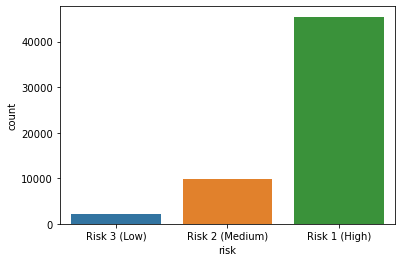

In [6]:
ax = sns.countplot(y,label="Count")       
H, M, L = y.value_counts()
print('Number of High risk: ',H)
print('Number of Medium risk : ',M)
print('Number of Low risk : ',M)



####  Numerical data distribution

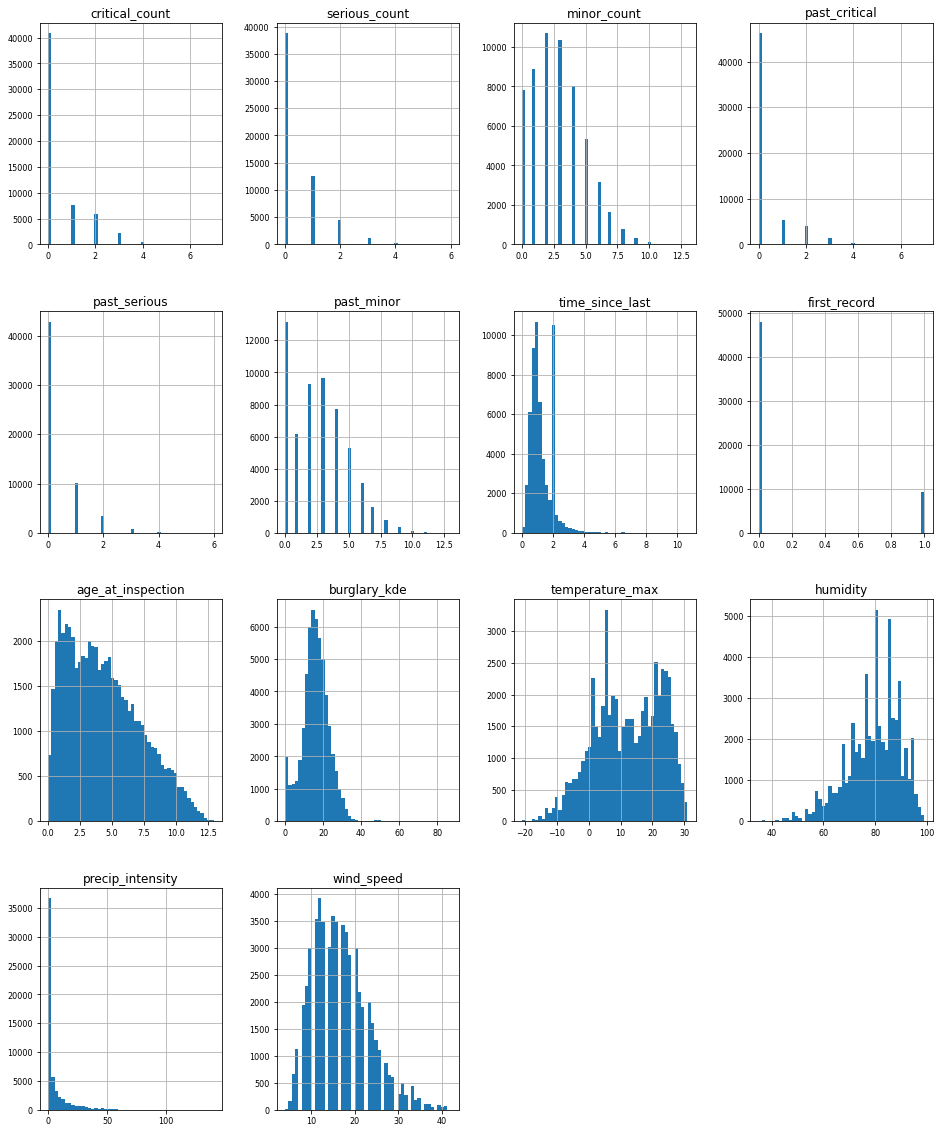

In [7]:
x.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Categorical to Quantitative relationship 

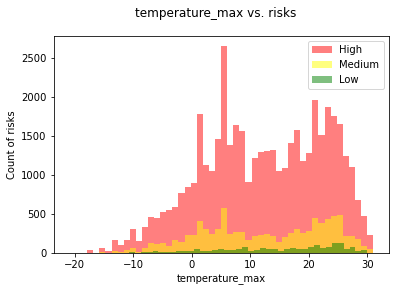

In [8]:
fig, ax = plt.subplots()

ax.hist(data[data["risk"]=='Risk 1 (High)']["temperature_max"], bins=50, alpha=0.5, color="red", label="High")
ax.hist(data[data["risk"]=='Risk 2 (Medium)']["temperature_max"], bins=50, alpha=0.5, color="yellow", label="Medium")
ax.hist(data[data["risk"]=='Risk 3 (Low)']["temperature_max"], bins=50, alpha=0.5, color="green", label="Low")

ax.set_xlabel("temperature_max")
ax.set_ylabel("Count of risks")

fig.suptitle("temperature_max vs. risks")

ax.legend();

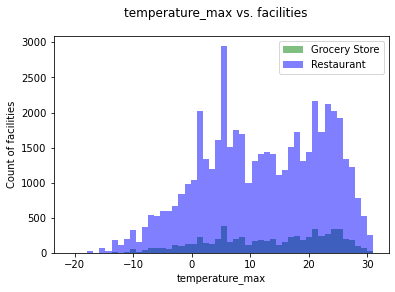

In [9]:
fig, ax = plt.subplots()

ax.hist(data[data["facility_type_x"]=='Grocery Store']["temperature_max"], bins=50, alpha=0.5, color="green", label="Grocery Store")
ax.hist(data[data["facility_type_x"]=='Restaurant']["temperature_max"], bins=50, alpha=0.5, color="blue", label="Restaurant")

ax.set_xlabel("temperature_max")
ax.set_ylabel("Count of facilities")

fig.suptitle("temperature_max vs. facilities")

ax.legend();

#### Correlation 

<AxesSubplot:>

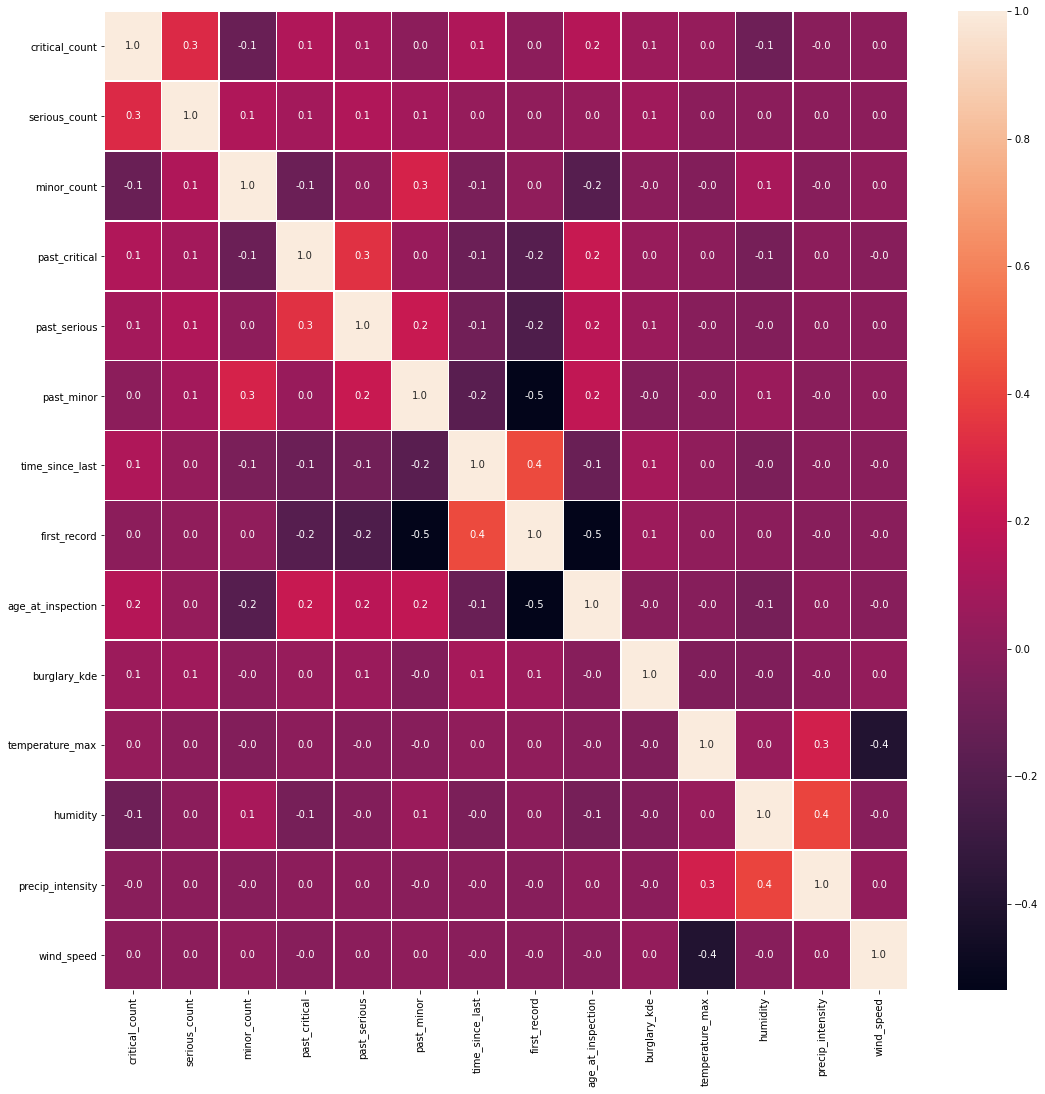

In [10]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Visualization

#### Visualization by date 

In [32]:
data['year']=data['inspection_date'].apply(lambda x:x.split('-')[0])
data['month']=data['inspection_date'].apply(lambda x:x.split('-')[1])
data['day']=data['inspection_date'].apply(lambda x:x.split('-')[2].split('T')[0])
data.reset_index(inplace=True)

Text(0.5, 0, 'month')

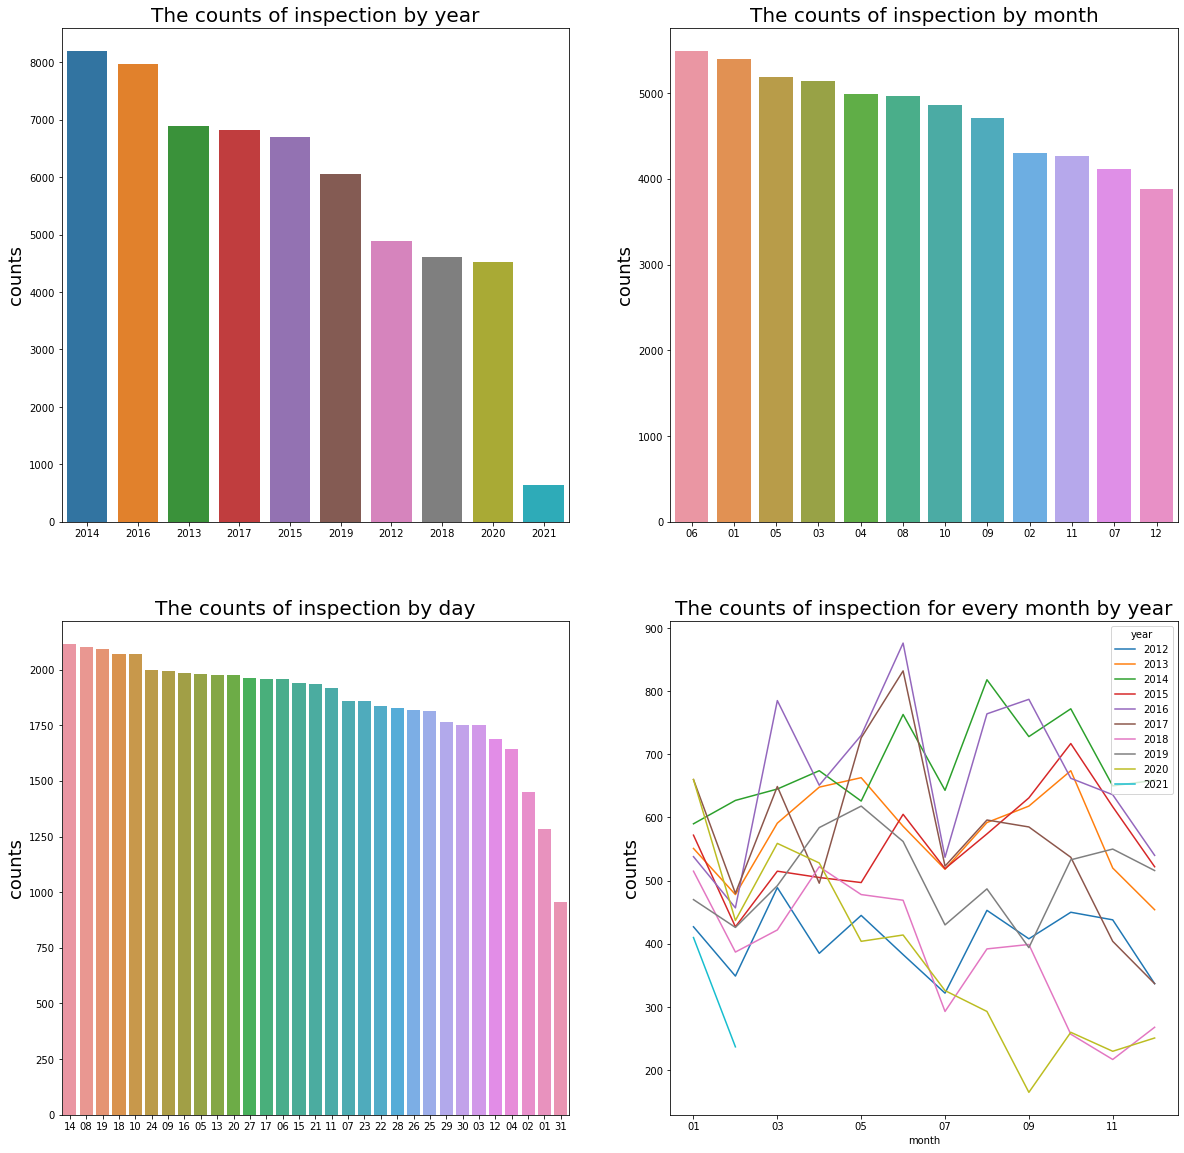

In [33]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
x=data.year.value_counts().index
y=data.year.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0])
ax[0,0].set_title("The counts of inspection by year",size=20)
ax[0,0].set_ylabel('counts',size=18)
ax[0,0].set_xlabel('')

x=data.month.value_counts().index
y=data.month.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,1])
ax[0,1].set_title("The counts of inspection by month",size=20)
ax[0,1].set_ylabel('counts',size=18)
ax[0,1].set_xlabel('')

x=data.day.value_counts().index
y=data.day.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,0])
ax[1,0].set_title("The counts of inspection by day",size=20)
ax[1,0].set_ylabel('counts',size=18)
ax[1,0].set_xlabel('')

data.groupby(['year','month'])['inspection_id'].agg('count').unstack('year').plot(ax=ax[1,1])
ax[1,1].set_title("The counts of inspection for every month by year",size=20)
ax[1,1].set_ylabel('counts',size=18)
ax[1,1].set_xlabel('month')

#### Visualisation for risk

Text(0, 0.5, 'LATITUDE')

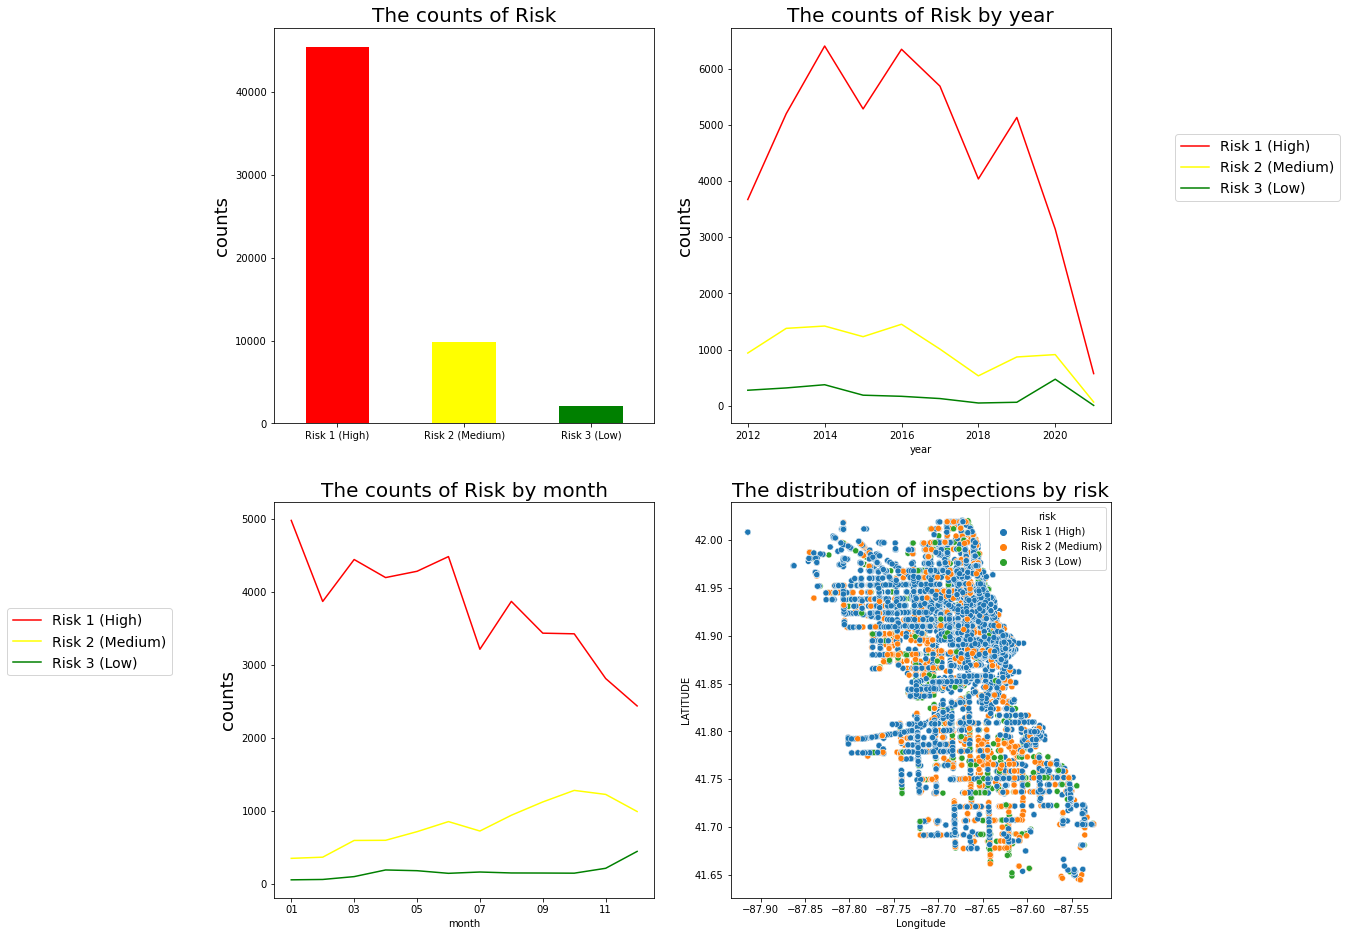

In [34]:
fig,ax=plt.subplots(2,2,figsize=(15,16))
data.risk.value_counts().plot(kind='bar',color=['red','yellow','green'],ax=ax[0,0])
ax[0,0].tick_params(axis='x',labelrotation=360)
ax[0,0].set_title("The counts of Risk",size=20)
ax[0,0].set_ylabel('counts',size=18)


data.groupby(['year','risk'])['inspection_id'].agg('count').unstack('risk').plot(ax=ax[0,1],color=['red','yellow','green'])
ax[0,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,0.75))
ax[0,1].set_title("The counts of Risk by year",size=20)
ax[0,1].set_ylabel('counts',size=18)

data.groupby(['month','risk'])['inspection_id'].agg('count').unstack('risk').plot(ax=ax[1,0],color=['red','yellow','green'])
ax[1,0].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(-0.25,0.75))
ax[1,0].set_title("The counts of Risk by month",size=20)
ax[1,0].set_ylabel('counts',size=18)

sns.scatterplot(x='longitude',y='latitude',hue='risk' ,data=data, ax=ax[1,1])
ax[1,1].set_title("The distribution of inspections by risk",size=20)
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_ylabel('LATITUDE')

##### Risk-1 Map 

In [37]:
data_risk1=data[data.risk=='Risk 1 (High)']

data_risk1_2000=data_risk1[:2000]
Long=data_risk1_2000.longitude.mean()
Lat=data_risk1_2000.latitude.mean()
risk1_map=folium.Map([Lat,Long],zoom_start=12)

risk1_distribution_map=plugins.MarkerCluster().add_to(risk1_map)
for lat,lon,label in zip(data_risk1_2000.latitude,data_risk1_2000.longitude,data_risk1_2000['aka_name']):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(risk1_distribution_map)
risk1_map.add_child(risk1_distribution_map)

risk1_map

##### Risk-2 Map  

In [40]:
data_risk2=data[data.risk=='Risk 2 (Medium)']

In [39]:
data_risk2_2000=data_risk2[:2000]
Long=data_risk2_2000.longitude.mean()
Lat=data_risk2_2000.latitude.mean()
risk2_map=folium.Map([Lat,Long],zoom_start=12)

risk2_distribution_map=plugins.MarkerCluster().add_to(risk2_map)
for lat,lon,label in zip(data_risk2_2000.latitude,data_risk2_2000.longitude,data_risk2_2000['aka_name']):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(risk2_distribution_map)
risk2_map.add_child(risk2_distribution_map)

risk2_map

##### Risk-3 map 

In [41]:
data_risk3=data[data.risk=='Risk 3 (Low)']

In [43]:
data_risk3_2000=data_risk3[:2000]
Long=data_risk3_2000.longitude.mean()
Lat=data_risk3_2000.latitude.mean()
risk3_map=folium.Map([Lat,Long],zoom_start=12)

risk3_distribution_map=plugins.MarkerCluster().add_to(risk3_map)
for lat,lon,label in zip(data_risk3_2000.latitude,data_risk3_2000.longitude,data_risk3_2000['aka_name']):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(risk3_distribution_map)
risk3_map.add_child(risk3_distribution_map)

risk3_map

##### Visualization for Results of inspection 

Text(0, 0.5, 'LATITUDE')

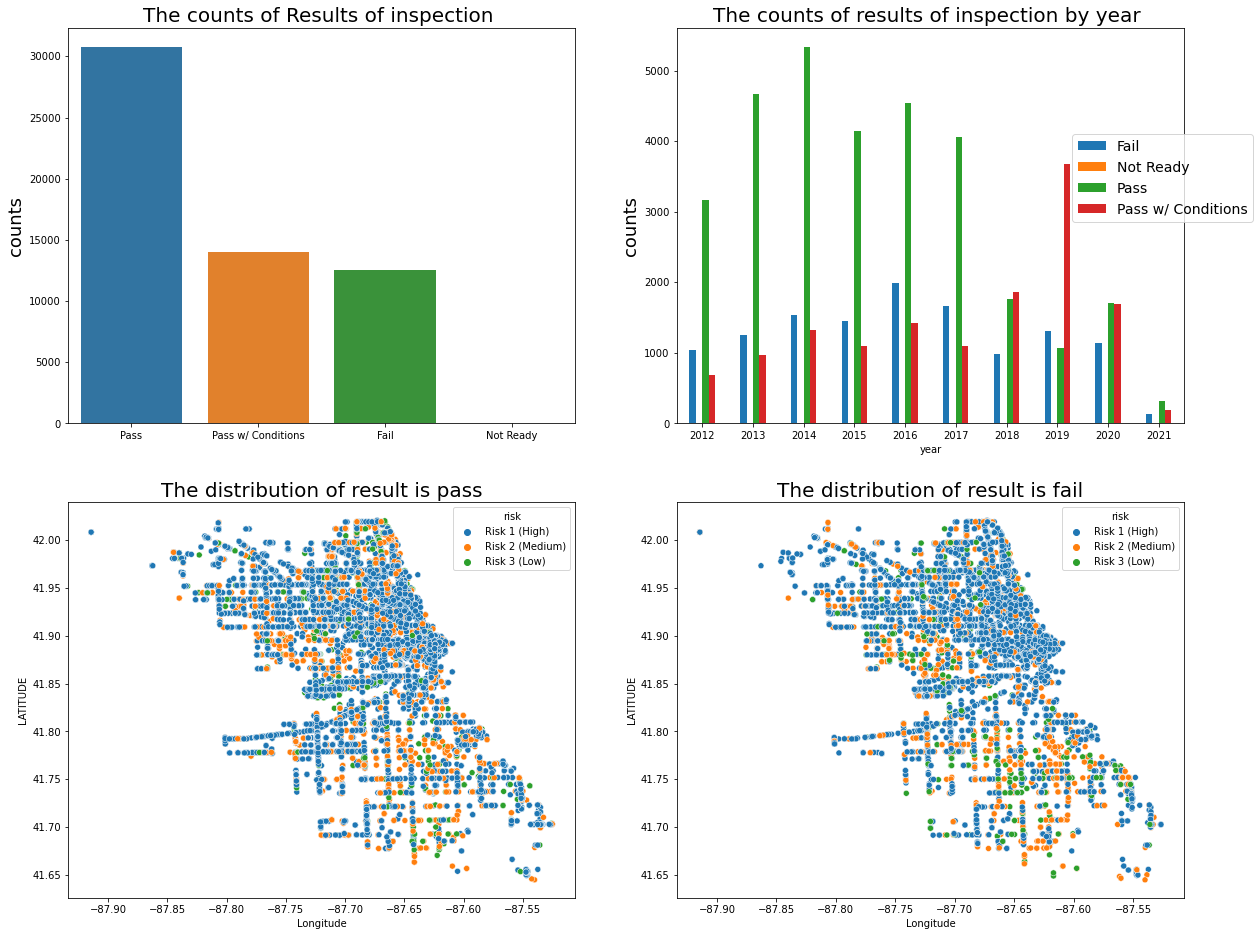

In [44]:
fig,ax=plt.subplots(2,2,figsize=(20,16))
x=data.results.value_counts().index
y=data.results.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0])
ax[0,0].set_title("The counts of Results of inspection ",size=20)
ax[0,0].set_ylabel('counts',size=18)
ax[0,0].set_xlabel('')

data.groupby(['results','year'])['inspection_id'].agg('count').unstack('results').plot(kind='bar',ax=ax[0,1])
ax[0,1].tick_params(axis='x',labelrotation=360)
ax[0,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,0.75))
ax[0,1].set_title("The counts of results of inspection by year ",size=20)
ax[0,1].set_ylabel('counts',size=18)

sns.scatterplot(x='longitude',y='latitude',hue='risk' ,hue_order=['Risk 1 (High)','Risk 2 (Medium)','Risk 3 (Low)'],data=data[data.results=='Pass'], ax=ax[1,0])
ax[1,0].set_title("The distribution of result is pass",size=20)
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_ylabel('LATITUDE')

sns.scatterplot(x='longitude',y='latitude',hue='risk',hue_order=['Risk 1 (High)','Risk 2 (Medium)','Risk 3 (Low)'] ,data=data[data.results=='Fail'], ax=ax[1,1])
ax[1,1].set_title("The distribution of result is fail",size=20)
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_ylabel('LATITUDE')